1. Open the file & Pre-processing 1

In [8]:
# USING THE UPDATED Dataset FILE

import pandas as pd
import sklearn as sk
import numpy as np
import pyreadstat
import math


In [9]:
filepath = "C:\\Users\\Marianne\\Downloads\\MASTERS THESIS MATHMOT\\Resources\\Dataset\\CSV_GraduDatasetMARIANNE_MEANvariables1.csv"
data = pd.read_csv(filepath, sep=";", na_values=99999)
# avoid datatype of core series series by using DataFrame
df = pd.DataFrame(data) 
df.head()

,SCHOOLID,CLASSID,STUDID,TCH_ID_C,GRADE,SGender,SAge,LANG,Books,AEQ1,...,MEAN_Anxiety,MEAN_Boredom,MEAN_Enj_Class,MEAN_Enj_HW,MEAN_Enj_Test,MEAN_Anx_Cl,MEAN_Anx_HW,MEAN_Anx_TEST,MEAN_Bor_Cl,MEAN_Bor_HW
0,246002,24600231,2460023100001,2460020131,3,0.0,9.0,3.0,2.0,4.0,...,2,"2,285714286","3,25","2,5",2,"1,25","1,666666667","2,8","2,25","2,333333333"
1,246002,24600231,2460023100002,2460020131,3,0.0,9.0,3.0,4.0,4.0,...,"1,416666667","1,142857143","3,5",3,"2,666666667","1,25",1,"1,8",1,"1,333333333"
2,246002,24600231,2460023100003,2460020131,3,0.0,10.0,2.0,2.0,4.0,...,"2,833333333","1,285714286","4,25","3,5","2,333333333","1,75",2,"4,2","1,5",1
3,246002,24600231,2460023100004,2460020131,3,0.0,NaN,4.0,5.0,2.0,...,"3,25","3,142857143","1,75",2,"1,666666667","2,5","2,333333333","4,4","3,5","2,666666667"
4,246002,24600231,2460023100005,2460020131,3,0.0,9.0,4.0,4.0,3.0,...,"1,25",2,"2,75","2,5","2,333333333",1,"1,333333333","1,4",2,2


In [10]:
# type(df["MEAN_Enjoyment"][2])
#datatype = string, should be float
df.head()

,SCHOOLID,CLASSID,STUDID,TCH_ID_C,GRADE,SGender,SAge,LANG,Books,AEQ1,...,MEAN_Anxiety,MEAN_Boredom,MEAN_Enj_Class,MEAN_Enj_HW,MEAN_Enj_Test,MEAN_Anx_Cl,MEAN_Anx_HW,MEAN_Anx_TEST,MEAN_Bor_Cl,MEAN_Bor_HW
0,246002,24600231,2460023100001,2460020131,3,0.0,9.0,3.0,2.0,4.0,...,2,"2,285714286","3,25","2,5",2,"1,25","1,666666667","2,8","2,25","2,333333333"
1,246002,24600231,2460023100002,2460020131,3,0.0,9.0,3.0,4.0,4.0,...,"1,416666667","1,142857143","3,5",3,"2,666666667","1,25",1,"1,8",1,"1,333333333"
2,246002,24600231,2460023100003,2460020131,3,0.0,10.0,2.0,2.0,4.0,...,"2,833333333","1,285714286","4,25","3,5","2,333333333","1,75",2,"4,2","1,5",1
3,246002,24600231,2460023100004,2460020131,3,0.0,NaN,4.0,5.0,2.0,...,"3,25","3,142857143","1,75",2,"1,666666667","2,5","2,333333333","4,4","3,5","2,666666667"
4,246002,24600231,2460023100005,2460020131,3,0.0,9.0,4.0,4.0,3.0,...,"1,25",2,"2,75","2,5","2,333333333",1,"1,333333333","1,4",2,2


In [11]:
# to avoid ValueError: could not convert string to float: ''
# check if or where the empty space is

columns_with_empty_spaces = df.columns[df.applymap(lambda x: x.isspace() if isinstance(x, str) else False).any()]

# Print the column names
print("Columns with empty spaces:", list(columns_with_empty_spaces))
df

Columns with empty spaces: ['Missing', 'add_C', 'sub_C', 'arithm', 'mul_C', 'MEAN_Enjoyment', 'MEAN_Anxiety', 'MEAN_Boredom', 'MEAN_Enj_Class', 'MEAN_Enj_HW', 'MEAN_Enj_Test', 'MEAN_Anx_Cl', 'MEAN_Anx_HW', 'MEAN_Anx_TEST', 'MEAN_Bor_Cl', 'MEAN_Bor_HW']


,SCHOOLID,CLASSID,STUDID,TCH_ID_C,GRADE,SGender,SAge,LANG,Books,AEQ1,...,MEAN_Anxiety,MEAN_Boredom,MEAN_Enj_Class,MEAN_Enj_HW,MEAN_Enj_Test,MEAN_Anx_Cl,MEAN_Anx_HW,MEAN_Anx_TEST,MEAN_Bor_Cl,MEAN_Bor_HW
0,246002,24600231,2460023100001,2460020131,3,0.0,9.0,3.0,2.0,4.0,...,2,"2,285714286","3,25","2,5",2,"1,25","1,666666667","2,8","2,25","2,333333333"
1,246002,24600231,2460023100002,2460020131,3,0.0,9.0,3.0,4.0,4.0,...,"1,416666667","1,142857143","3,5",3,"2,666666667","1,25",1,"1,8",1,"1,333333333"
2,246002,24600231,2460023100003,2460020131,3,0.0,10.0,2.0,2.0,4.0,...,"2,833333333","1,285714286","4,25","3,5","2,333333333","1,75",2,"4,2","1,5",1
3,246002,24600231,2460023100004,2460020131,3,0.0,NaN,4.0,5.0,2.0,...,"3,25","3,142857143","1,75",2,"1,666666667","2,5","2,333333333","4,4","3,5","2,666666667"
4,246002,24600231,2460023100005,2460020131,3,0.0,9.0,4.0,4.0,3.0,...,"1,25",2,"2,75","2,5","2,333333333",1,"1,333333333","1,4",2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,246050,24605041,2460504100007,2460500241,4,0.0,11.0,4.0,4.0,2.0,...,"1,583333333","3,857142857","1,25",1,2,2,"1,333333333","1,4",4,"3,666666667"
1763,246050,24605041,2460504100008,2460500241,4,1.0,10.0,4.0,5.0,5.0,...,"1,25","1,142857143","4,75",3,5,1,1,"1,6",1,"1,333333333"
1764,246050,24605041,2460504100009,2460500241,4,1.0,10.0,4.0,5.0,5.0,...,"1,333333333","1,428571429","4,75",3,"4,666666667","1,5","1,333333333","1,2","1,25","1,666666667"
1765,246050,24605041,2460504100010,2460500241,4,1.0,10.0,4.0,4.0,4.0,...,"1,416666667",2,"3,75","2,5","3,333333333",1,1,2,2,2


In [12]:
# Replace empty spaces with NaN
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

# Replace commas with dots and convert the DataFrame to float
df = df.replace({',': '.'}, regex=True).astype(float)

# Print the result
df

,SCHOOLID,CLASSID,STUDID,TCH_ID_C,GRADE,SGender,SAge,LANG,Books,AEQ1,...,MEAN_Anxiety,MEAN_Boredom,MEAN_Enj_Class,MEAN_Enj_HW,MEAN_Enj_Test,MEAN_Anx_Cl,MEAN_Anx_HW,MEAN_Anx_TEST,MEAN_Bor_Cl,MEAN_Bor_HW
0,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,9.0,3.0,2.0,4.0,...,2.000000,2.285714,3.25,2.5,2.000000,1.25,1.666667,2.8,2.25,2.333333
1,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,9.0,3.0,4.0,4.0,...,1.416667,1.142857,3.50,3.0,2.666667,1.25,1.000000,1.8,1.00,1.333333
2,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,10.0,2.0,2.0,4.0,...,2.833333,1.285714,4.25,3.5,2.333333,1.75,2.000000,4.2,1.50,1.000000
3,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,NaN,4.0,5.0,2.0,...,3.250000,3.142857,1.75,2.0,1.666667,2.50,2.333333,4.4,3.50,2.666667
4,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,9.0,4.0,4.0,3.0,...,1.250000,2.000000,2.75,2.5,2.333333,1.00,1.333333,1.4,2.00,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,246050.0,24605041.0,2.460504e+12,2.460500e+09,4.0,0.0,11.0,4.0,4.0,2.0,...,1.583333,3.857143,1.25,1.0,2.000000,2.00,1.333333,1.4,4.00,3.666667
1763,246050.0,24605041.0,2.460504e+12,2.460500e+09,4.0,1.0,10.0,4.0,5.0,5.0,...,1.250000,1.142857,4.75,3.0,5.000000,1.00,1.000000,1.6,1.00,1.333333
1764,246050.0,24605041.0,2.460504e+12,2.460500e+09,4.0,1.0,10.0,4.0,5.0,5.0,...,1.333333,1.428571,4.75,3.0,4.666667,1.50,1.333333,1.2,1.25,1.666667
1765,246050.0,24605041.0,2.460504e+12,2.460500e+09,4.0,1.0,10.0,4.0,4.0,4.0,...,1.416667,2.000000,3.75,2.5,3.333333,1.00,1.000000,2.0,2.00,2.000000


In [13]:
# Convert the DataFrame to float
df = df.astype(float)

df

,SCHOOLID,CLASSID,STUDID,TCH_ID_C,GRADE,SGender,SAge,LANG,Books,AEQ1,...,MEAN_Anxiety,MEAN_Boredom,MEAN_Enj_Class,MEAN_Enj_HW,MEAN_Enj_Test,MEAN_Anx_Cl,MEAN_Anx_HW,MEAN_Anx_TEST,MEAN_Bor_Cl,MEAN_Bor_HW
0,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,9.0,3.0,2.0,4.0,...,2.000000,2.285714,3.25,2.5,2.000000,1.25,1.666667,2.8,2.25,2.333333
1,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,9.0,3.0,4.0,4.0,...,1.416667,1.142857,3.50,3.0,2.666667,1.25,1.000000,1.8,1.00,1.333333
2,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,10.0,2.0,2.0,4.0,...,2.833333,1.285714,4.25,3.5,2.333333,1.75,2.000000,4.2,1.50,1.000000
3,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,NaN,4.0,5.0,2.0,...,3.250000,3.142857,1.75,2.0,1.666667,2.50,2.333333,4.4,3.50,2.666667
4,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,9.0,4.0,4.0,3.0,...,1.250000,2.000000,2.75,2.5,2.333333,1.00,1.333333,1.4,2.00,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,246050.0,24605041.0,2.460504e+12,2.460500e+09,4.0,0.0,11.0,4.0,4.0,2.0,...,1.583333,3.857143,1.25,1.0,2.000000,2.00,1.333333,1.4,4.00,3.666667
1763,246050.0,24605041.0,2.460504e+12,2.460500e+09,4.0,1.0,10.0,4.0,5.0,5.0,...,1.250000,1.142857,4.75,3.0,5.000000,1.00,1.000000,1.6,1.00,1.333333
1764,246050.0,24605041.0,2.460504e+12,2.460500e+09,4.0,1.0,10.0,4.0,5.0,5.0,...,1.333333,1.428571,4.75,3.0,4.666667,1.50,1.333333,1.2,1.25,1.666667
1765,246050.0,24605041.0,2.460504e+12,2.460500e+09,4.0,1.0,10.0,4.0,4.0,4.0,...,1.416667,2.000000,3.75,2.5,3.333333,1.00,1.000000,2.0,2.00,2.000000


In [14]:
type(df["MEAN_Enjoyment"][2])

numpy.float64

In [15]:
print("Number of NaNs before removal:", df.isna().sum())

Number of NaNs before removal: SCHOOLID                         0
CLASSID                          0
STUDID                           0
TCH_ID_C                         0
GRADE                            0
SGender                         18
SAge                            41
LANG                            16
Books                           28
AEQ1                            17
AEQ2                            19
AEQ3                            15
AEQ4                            16
AEQ5                            30
AEQ6                            30
AEQ7                            30
AEQ8                            29
AEQ9                            29
AEQ10                           33
AEQ11                           33
AEQ12                           31
AEQ13                           21
AEQ14                           27
AEQ15                           22
AEQ16                           21
AEQ17                           22
AEQ18                           22
AEQ19                   

In [16]:
# df = df.dropna()
# print("Number of NaNs after removal:", df.isna().sum())

In [17]:
print(df[df.isna().all(axis=1)])

Empty DataFrame
Columns: [SCHOOLID, CLASSID, STUDID, TCH_ID_C, GRADE, SGender, SAge, LANG, Books, AEQ1, AEQ2, AEQ3, AEQ4, AEQ5, AEQ6, AEQ7, AEQ8, AEQ9, AEQ10, AEQ11, AEQ12, AEQ13, AEQ14, AEQ15, AEQ16, AEQ17, AEQ18, AEQ19, AEQ20, AEQ21, AEQ22, AEQ23, AEQ24, AEQ25, AEQ26, AEQ27, AEQ28, MathWaveOneIRT, PrimaryLast_duplicateFirst, filter_$, Missing, add_C, sub_C, arithm, mul_C, MEAN_Enjoyment, MEAN_Anxiety, MEAN_Boredom, MEAN_Enj_Class, MEAN_Enj_HW, MEAN_Enj_Test, MEAN_Anx_Cl, MEAN_Anx_HW, MEAN_Anx_TEST, MEAN_Bor_Cl, MEAN_Bor_HW]
Index: []

[0 rows x 56 columns]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SCHOOLID                    1767 non-null   float64
 1   CLASSID                     1767 non-null   float64
 2   STUDID                      1767 non-null   float64
 3   TCH_ID_C                    1767 non-null   float64
 4   GRADE                       1767 non-null   float64
 5   SGender                     1749 non-null   float64
 6   SAge                        1726 non-null   float64
 7   LANG                        1751 non-null   float64
 8   Books                       1739 non-null   float64
 9   AEQ1                        1750 non-null   float64
 10  AEQ2                        1748 non-null   float64
 11  AEQ3                        1752 non-null   float64
 12  AEQ4                        1751 non-null   float64
 13  AEQ5                        1737 

In [19]:
nan_cols = df.isnull().sum()
nan_cols
# False = There are no missing values

SCHOOLID                         0
CLASSID                          0
STUDID                           0
TCH_ID_C                         0
GRADE                            0
SGender                         18
SAge                            41
LANG                            16
Books                           28
AEQ1                            17
AEQ2                            19
AEQ3                            15
AEQ4                            16
AEQ5                            30
AEQ6                            30
AEQ7                            30
AEQ8                            29
AEQ9                            29
AEQ10                           33
AEQ11                           33
AEQ12                           31
AEQ13                           21
AEQ14                           27
AEQ15                           22
AEQ16                           21
AEQ17                           22
AEQ18                           22
AEQ19                           20
AEQ20               

In [20]:
variables = ["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]
df_variables = df[variables]
df_variables.head()

,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
0,2.666667,2.000000,2.285714
1,3.111111,1.416667,1.142857
2,3.444444,2.833333,1.285714
3,1.777778,3.250000,3.142857
4,2.555556,1.250000,2.000000


In [21]:
studid_variables = ["STUDID", "MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]
df_studid_variables = df[studid_variables]
df_studid_variables.head()

,STUDID,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
0,2.460023e+12,2.666667,2.000000,2.285714
1,2.460023e+12,3.111111,1.416667,1.142857
2,2.460023e+12,3.444444,2.833333,1.285714
3,2.460023e+12,1.777778,3.250000,3.142857
4,2.460023e+12,2.555556,1.250000,2.000000


In [22]:
print(df_variables.mean(), df_variables.median(), df_variables.mode())


MEAN_Enjoyment    2.920871
MEAN_Anxiety      1.431386
MEAN_Boredom      2.028928
dtype: float64 MEAN_Enjoyment    2.888889
MEAN_Anxiety      1.250000
MEAN_Boredom      1.857143
dtype: float64    MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0        2.444444           1.0           1.0


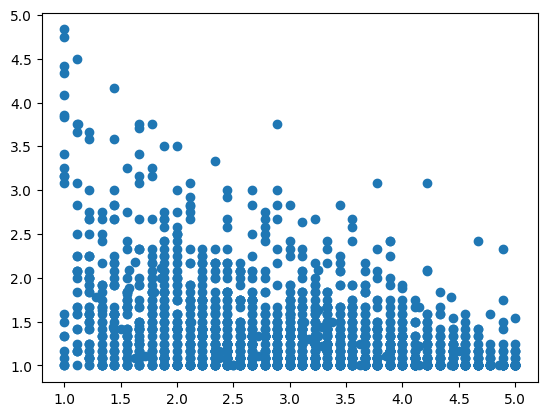

In [24]:
# Screen & Visualize Anxiety
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df.MEAN_Enjoyment, df["MEAN_Anxiety"])

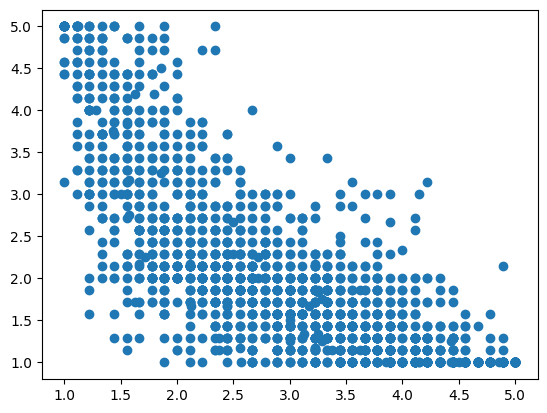

In [25]:
# Screen & Visualize boredom
%matplotlib inline
plt.scatter(df.MEAN_Enjoyment, df["MEAN_Boredom"])

In [26]:
# Check for missing values (NaNs)

df_variables.isna().any()

MEAN_Enjoyment    True
MEAN_Anxiety      True
MEAN_Boredom      True
dtype: bool

In [27]:
# deal with NaNs by filling them with mean values

df_variables.fillna(df_variables.mean())

,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
0,2.666667,2.000000,2.285714
1,3.111111,1.416667,1.142857
2,3.444444,2.833333,1.285714
3,1.777778,3.250000,3.142857
4,2.555556,1.250000,2.000000
...,...,...,...
1762,1.444444,1.583333,3.857143
1763,4.444444,1.250000,1.142857
1764,4.333333,1.333333,1.428571
1765,3.333333,1.416667,2.000000


In [28]:
df_variables.isna().any()


MEAN_Enjoyment    True
MEAN_Anxiety      True
MEAN_Boredom      True
dtype: bool

In [29]:
df_variables.describe()

,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
count,1755.000000,1755.000000,1755.000000
mean,2.920871,1.431386,2.028928
std,1.028757,0.528776,1.008056
min,1.000000,1.000000,1.000000
25%,2.111111,1.083333,1.285714
50%,2.888889,1.250000,1.857143
75%,3.666667,1.583333,2.428571
max,5.000000,4.833333,5.000000


In [30]:
df_variables.fillna(df_variables.mean(), inplace=True)

C:\Users\Marianne\AppData\Local\Temp\ipykernel_19564\1201876518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables.fillna(df_variables.mean(), inplace=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_19564\1201876518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables.fillna(df_variables.mean(), inplace=True)
C:\Users\Marianne\AppData\Local\Temp\ipykernel_19564\1201876518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [31]:
(2.920871 +	1.431386 +	2.028928) / 3

2.1270616666666666

In [32]:
df_variables.isna().any()

MEAN_Enjoyment    False
MEAN_Anxiety      False
MEAN_Boredom      False
dtype: bool

In [33]:
df_variables.head()

,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
0,2.666667,2.000000,2.285714
1,3.111111,1.416667,1.142857
2,3.444444,2.833333,1.285714
3,1.777778,3.250000,3.142857
4,2.555556,1.250000,2.000000


In [34]:
df_studid_variables.isna().any()

STUDID            False
MEAN_Enjoyment     True
MEAN_Anxiety       True
MEAN_Boredom       True
dtype: bool

In [35]:
df.loc[:, variables] = df[variables].fillna(df[variables].mean())
df.head()

,SCHOOLID,CLASSID,STUDID,TCH_ID_C,GRADE,SGender,SAge,LANG,Books,AEQ1,...,MEAN_Anxiety,MEAN_Boredom,MEAN_Enj_Class,MEAN_Enj_HW,MEAN_Enj_Test,MEAN_Anx_Cl,MEAN_Anx_HW,MEAN_Anx_TEST,MEAN_Bor_Cl,MEAN_Bor_HW
0,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,9.0,3.0,2.0,4.0,...,2.000000,2.285714,3.25,2.5,2.000000,1.25,1.666667,2.8,2.25,2.333333
1,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,9.0,3.0,4.0,4.0,...,1.416667,1.142857,3.50,3.0,2.666667,1.25,1.000000,1.8,1.00,1.333333
2,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,10.0,2.0,2.0,4.0,...,2.833333,1.285714,4.25,3.5,2.333333,1.75,2.000000,4.2,1.50,1.000000
3,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,NaN,4.0,5.0,2.0,...,3.250000,3.142857,1.75,2.0,1.666667,2.50,2.333333,4.4,3.50,2.666667
4,246002.0,24600231.0,2.460023e+12,2.460020e+09,3.0,0.0,9.0,4.0,4.0,3.0,...,1.250000,2.000000,2.75,2.5,2.333333,1.00,1.333333,1.4,2.00,2.000000


In [36]:
df.isna().any()

SCHOOLID                      False
CLASSID                       False
STUDID                        False
TCH_ID_C                      False
GRADE                         False
SGender                        True
SAge                           True
LANG                           True
Books                          True
AEQ1                           True
AEQ2                           True
AEQ3                           True
AEQ4                           True
AEQ5                           True
AEQ6                           True
AEQ7                           True
AEQ8                           True
AEQ9                           True
AEQ10                          True
AEQ11                          True
AEQ12                          True
AEQ13                          True
AEQ14                          True
AEQ15                          True
AEQ16                          True
AEQ17                          True
AEQ18                          True
AEQ19                       

In [37]:
df.columns

Index(['SCHOOLID', 'CLASSID', 'STUDID', 'TCH_ID_C', 'GRADE', 'SGender', 'SAge',
       'LANG', 'Books', 'AEQ1', 'AEQ2', 'AEQ3', 'AEQ4', 'AEQ5', 'AEQ6', 'AEQ7',
       'AEQ8', 'AEQ9', 'AEQ10', 'AEQ11', 'AEQ12', 'AEQ13', 'AEQ14', 'AEQ15',
       'AEQ16', 'AEQ17', 'AEQ18', 'AEQ19', 'AEQ20', 'AEQ21', 'AEQ22', 'AEQ23',
       'AEQ24', 'AEQ25', 'AEQ26', 'AEQ27', 'AEQ28', 'MathWaveOneIRT',
       'PrimaryLast_duplicateFirst', 'filter_$', 'Missing', 'add_C', 'sub_C',
       'arithm', 'mul_C', 'MEAN_Enjoyment', 'MEAN_Anxiety', 'MEAN_Boredom',
       'MEAN_Enj_Class', 'MEAN_Enj_HW', 'MEAN_Enj_Test', 'MEAN_Anx_Cl',
       'MEAN_Anx_HW', 'MEAN_Anx_TEST', 'MEAN_Bor_Cl', 'MEAN_Bor_HW'],
      dtype='object')

In [38]:
df[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]].max()

MEAN_Enjoyment    5.000000
MEAN_Anxiety      4.833333
MEAN_Boredom      5.000000
dtype: float64

2. Pre-processing 2 Make sure each relevant column is float:

In [39]:
df["MEAN_Enjoyment"] = df["MEAN_Enjoyment"].apply(lambda x: float(x))


In [40]:
df["MEAN_Anxiety"] = df["MEAN_Anxiety"].apply(lambda x: float(x))


In [41]:
df["MEAN_Boredom"] = df["MEAN_Boredom"].apply(lambda x: float(x))


In [42]:
df["STUDID"] = df["STUDID"].apply(lambda x: float(x))


In [43]:
df_main = ["STUDID", "MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]

In [44]:
# Convert the newly specified columns into a dataframe
df_main = pd.DataFrame(data)

In [45]:
df_main = df_main.apply(lambda x: pd.to_numeric(x, errors='coerce'))


In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

km = KMeans(n_clusters=3, n_init=100)
km

KMeans(n_clusters=3, n_init=100)

In [47]:
#model = KMeans[n_cluster=3, init = "K-means++"]

features = ["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]

In [48]:
#df_features = pd.DataFrame()

In [49]:
#y_predicted = km.fit_predict(df[["MEAN_Enjoyment", "MEAN_Anxiety", "MEAN_Boredom"]])
# https://www.youtube.com/watch?v=iNlZ3IU5Ffw
# https://www.youtube.com/watch?v=EItlUEPCIzM
# https://www.youtube.com/watch?v=DqTclw2MzcM

In [50]:
# THIS https://www.youtube.com/watch?v=lX-3nGHDhQg
emotions = df.dropna(subset=features)

In [51]:
clustering_data = df[features].copy() 

In [52]:
clustering_data

,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
0,2.666667,2.000000,2.285714
1,3.111111,1.416667,1.142857
2,3.444444,2.833333,1.285714
3,1.777778,3.250000,3.142857
4,2.555556,1.250000,2.000000
...,...,...,...
1762,1.444444,1.583333,3.857143
1763,4.444444,1.250000,1.142857
1764,4.333333,1.333333,1.428571
1765,3.333333,1.416667,2.000000


3. Create the K-means algorithm: initialize random centroids

In [53]:
# 1. Scale the data (no need)
# 2. Initialize random centroids
# 3. Label each data point
# 4. Update centroids
# 5. Repeate steps 3 and 4 until centroids stop changing

In [54]:
# 2 Initialize random centroids

#initialize one centroid

# iterate through each column with apply method
# select a single sample value from a column, randomly
# return it as float instead of the default series

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = clustering_data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    # combine all the pandas series (centroids) into a dataframe
    return pd.concat(centroids, axis=1)

In [55]:
centroids = random_centroids(clustering_data, 3)
centroids

,0,1,2
MEAN_Enjoyment,2.333333,2.666667,1.000000
MEAN_Anxiety,1.000000,1.000000,1.583333
MEAN_Boredom,3.285714,3.142857,3.428571


In [56]:
#import random 
#centroid_2 = random.uniform(1.0,5.0)
#centroid_2

In [57]:
# 3. Label initial cluster points
# Calculate the Euclidean distance

def get_labels(clustering_data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((clustering_data - x) ** 2).sum(axis=1)))

    # Find the index (cluster)  assignment for each datapoint (student)
    return distances.idxmin(axis=1)

In [58]:
distances = centroids.apply(lambda x: np.sqrt(((clustering_data - x) ** 2).sum(axis=1)))

distances
# each number represents distance from a student to the cluster center
# in the first row (first student) the closest cluster to him/her is cluster 0.

,0,1,2
0,1.452966,1.317078,2.063374
1,2.317409,2.090728,3.115936
2,2.931839,2.723055,3.482764
3,2.321971,2.419220,1.861276
4,1.328512,1.175146,2.138149
...,...,...,...
1762,1.207034,1.531114,0.617417
1763,3.018464,2.687563,4.147264
1764,2.749562,2.414056,3.895332
1765,1.681271,1.387147,2.740992


In [59]:
labels = get_labels(clustering_data, centroids)

In [60]:
# How many students there are in each cluster?

labels.value_counts()


1    1314
2     270
0     183
dtype: int64

In [61]:
# Let's update the centroids
# New_centroids of each cluster = Find all students and take geometric (Euclidean) mean of the points.
            # Multiply each point and take the nth root based on the number of points.
# Let's save memory, in that we don't get huge numbers.

# exp = e raised to a power
# log = natural logarithm: a number's logarithm to the base of its constant e.
# Split the data into groups based on their labels before applying. Each "labels" series gives the cluster assignement.
clustering_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean()))


,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
0,1.929728,1.344172,2.656556
1,3.268070,1.280069,1.507279
2,1.420544,1.843629,3.574981


In [62]:
# Switch columns and rows. (Transpose.) So that it is similar to the initial random centroids.
# Wrap it into a function
def new_centroids(clustering_data, labels, k):
    return clustering_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    


In [63]:
clustering_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

,0,1,2
MEAN_Enjoyment,1.929728,3.268070,1.420544
MEAN_Anxiety,1.344172,1.280069,1.843629
MEAN_Boredom,2.656556,1.507279,3.574981


5. Repeat the process with algorithm (and visualize)

In [64]:
# 5. Create the iterative algorithm that repeats the process
# For cool points, let's create visualisation of the cluster assignment at each iteration

from sklearn.decomposition import PCA # Turn the 3-dimensional data to 2-dimensional data
import matplotlib.pyplot as plt 
from IPython.display import clear_output # clear jupyter notebook each time we plot




In [65]:
K = 3
centers = K

def plot_clusters(clustering_data, labels, centroids, iteration): # iteration counter
    pca = PCA(n_components=2) # Ask for 2-dimensional (2 columns) data
    data_2d = pca.fit_transform(clustering_data) # Fit the model, then run the model that turns it into 2-d.
    centroids_2d = pca.fit_transform(centroids.T) # Transpose needed because The PCA model expects columns = features, and rows = datapoints
    clear_output(wait=True) # if graph displayed, clear it.
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels) # x-axis is the 2-d data and y-axis 2-d data second component. Color based on cluster labels.
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1]) # plot the centroids
    plt.show()


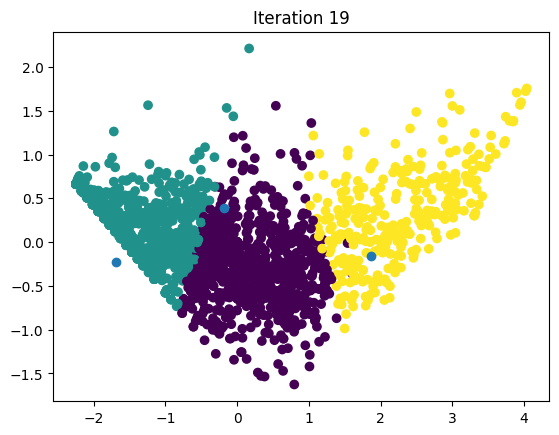

In [66]:
max_iterations = 100
k = 3

# Let's Stop the algorithm once old_centroids is equal to  centroids, when the centroids have stabilized

centroids = random_centroids(clustering_data, k) # initialize cluster centorids

old_centroids = pd.DataFrame() # initialize the old centroids.
iteration = 1

# stop iteration either when iteration = iteration, or centroids = old_centroids.
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(clustering_data, centroids) # get labels correspongind to each student
    centroids = new_centroids(clustering_data, labels, k)
    plot_clusters(clustering_data, labels, centroids, iteration)

    iteration += 1


In [67]:
centroids

,0,1,2
MEAN_Enjoyment,2.506489,3.974103,1.529623
MEAN_Anxiety,1.371911,1.202897,1.724042
MEAN_Boredom,1.906494,1.225190,3.756564


In [68]:
# interpretation. Cluster 0 is the positive cluster. Let's try to confirm the hypothesis.
# Looking at the cluster no 0.
df[labels ==0][["STUDID"] + features]

,STUDID,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
0,2.460023e+12,2.666667,2.000000,2.285714
4,2.460023e+12,2.555556,1.250000,2.000000
6,2.460023e+12,2.888889,1.166667,1.000000
7,2.460023e+12,1.888889,1.583333,1.571429
9,2.460023e+12,2.666667,2.250000,2.000000
...,...,...,...,...
1755,2.460503e+12,3.111111,1.000000,1.428571
1757,2.460504e+12,3.111111,1.083333,2.714286
1760,2.460504e+12,3.222222,1.666667,2.000000
1761,2.460504e+12,2.111111,1.166667,2.000000


In [69]:
# Cluster 1 seems to be bored and sliiightly anxious students
# Let's see what the students look like:
df[labels ==1][["STUDID"] + features]

# in this view anxiety seems to be comparatively high in half of the sample cases.

,STUDID,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
1,2.460023e+12,3.111111,1.416667,1.142857
2,2.460023e+12,3.444444,2.833333,1.285714
5,2.460023e+12,4.777778,1.000000,1.000000
8,2.460023e+12,4.444444,1.166667,1.285714
15,2.460023e+12,4.666667,1.083333,1.000000
...,...,...,...,...
1753,2.460503e+12,3.333333,1.166667,1.428571
1756,2.460504e+12,4.222222,1.083333,1.000000
1763,2.460504e+12,4.444444,1.250000,1.142857
1764,2.460504e+12,4.333333,1.333333,1.428571


In [70]:
# From the centroids, cluster 2 seems to be a moderate profile. Somewhat lower enjoymnent than positive profile, not as high boredom and anxiety than the negative profile.
df[labels ==2][["STUDID"] + features]

,STUDID,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
3,2.460023e+12,1.777778,3.250000,3.142857
12,2.460023e+12,1.000000,3.416667,4.428571
21,2.460024e+12,1.888889,2.250000,3.142857
23,2.460024e+12,1.777778,1.416667,4.428571
27,2.460024e+12,1.555556,1.250000,3.571429
...,...,...,...,...
1739,2.460494e+12,1.777778,1.416667,3.428571
1748,2.460503e+12,1.111111,3.083333,4.857143
1758,2.460504e+12,2.111111,1.166667,3.000000
1759,2.460504e+12,1.222222,3.583333,4.428571


In [71]:
# make a bar plot



In [72]:
# compare the result to sklearn's Kmeans function

from sklearn.cluster import KMeans

In [73]:
K=3
kmeans = KMeans(n_clusters=K, random_state=3, n_init=50, init="random")
kmeans


KMeans(init='random', n_clusters=3, n_init=50, random_state=3)

In [74]:
X = clustering_data

kmeans = KMeans(n_clusters=3, random_state=3, n_init=60, init="random")
kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=60, random_state=3)

In [75]:
centroids = kmeans.cluster_centers_

In [76]:
pd.DataFrame(centroids, columns=features)

,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
0,2.567648,1.416775,1.969208
1,1.570540,1.903497,3.846013
2,4.020911,1.227019,1.246893


In [77]:
# Next: add random_states to ensure replicability

In [78]:
# predicted = kmeans.fit_predict(df[["MEAN_Enjoyment"]["MEAN_Anxiety"]["MEAN_Boredom"]])

In [79]:
print(clustering_data)


      MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0           2.666667      2.000000      2.285714
1           3.111111      1.416667      1.142857
2           3.444444      2.833333      1.285714
3           1.777778      3.250000      3.142857
4           2.555556      1.250000      2.000000
...              ...           ...           ...
1762        1.444444      1.583333      3.857143
1763        4.444444      1.250000      1.142857
1764        4.333333      1.333333      1.428571
1765        3.333333      1.416667      2.000000
1766        3.888889      1.333333      1.142857

[1767 rows x 3 columns]


In [80]:
# Using the values attribute to get the NumPy array
numpy_array = clustering_data.values

# Displaying the shape of the NumPy array
print(numpy_array.shape)


(1767, 3)


In [81]:
print(clustering_data)

      MEAN_Enjoyment  MEAN_Anxiety  MEAN_Boredom
0           2.666667      2.000000      2.285714
1           3.111111      1.416667      1.142857
2           3.444444      2.833333      1.285714
3           1.777778      3.250000      3.142857
4           2.555556      1.250000      2.000000
...              ...           ...           ...
1762        1.444444      1.583333      3.857143
1763        4.444444      1.250000      1.142857
1764        4.333333      1.333333      1.428571
1765        3.333333      1.416667      2.000000
1766        3.888889      1.333333      1.142857

[1767 rows x 3 columns]


In [82]:
print(clustering_data.values)

[[2.66666667 2.         2.28571429]
 [3.11111111 1.41666667 1.14285714]
 [3.44444444 2.83333333 1.28571429]
 ...
 [4.33333333 1.33333333 1.42857143]
 [3.33333333 1.41666667 2.        ]
 [3.88888889 1.33333333 1.14285714]]


In [83]:
X = clustering_data

kmeans = KMeans(n_clusters=3, random_state=3, n_init=60, init="random")
kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=60, random_state=3)

In [84]:
centroids = kmeans.cluster_centers_

In [85]:
pd.DataFrame(centroids, columns=features)

,MEAN_Enjoyment,MEAN_Anxiety,MEAN_Boredom
0,2.567648,1.416775,1.969208
1,1.570540,1.903497,3.846013
2,4.020911,1.227019,1.246893


In [86]:
# Transposed

# COMPARE THE MANUAL K-MEANS TO SCIKIT K-MEANS

# THIS is the Scikit-learning library k-means results

pd.DataFrame(centroids, columns=features).T

,0,1,2
MEAN_Enjoyment,2.567648,1.570540,4.020911
MEAN_Anxiety,1.416775,1.903497,1.227019
MEAN_Boredom,1.969208,3.846013,1.246893


In [87]:
# THIS is the earlier results of manual (Dataquest youtuber's code) k-means
centroids

array([[2.56764781, 1.41677465, 1.96920768],
       [1.57054   , 1.90349748, 3.84601329],
       [4.02091133, 1.22701861, 1.24689278]])

In [88]:
# To fix an error with the fit(data) function during kmeans I checked the following
# Update conda all libraries
# update numpy and scipy (i tried this first)
# run %BLAS%
import numpy as np
np.__config__.show()

openblas64__info:
    libraries = ['openblas64_', 'openblas64_']
    library_dirs = ['openblas\\lib']
    language = c
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None)]
    runtime_library_dirs = ['openblas\\lib']
blas_ilp64_opt_info:
    libraries = ['openblas64_', 'openblas64_']
    library_dirs = ['openblas\\lib']
    language = c
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None)]
    runtime_library_dirs = ['openblas\\lib']
openblas64__lapack_info:
    libraries = ['openblas64_', 'openblas64_']
    library_dirs = ['openblas\\lib']
    language = c
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None), ('HAVE_LAPACKE', None)]
    runtime_library_dirs = ['openblas\\lib']
lapack_ilp64_opt_info:
    libraries = ['openblas64_', 'openblas64_']
    library_dirs = ['openblas\\lib']
    language = c
    define_macros = [('HAVE_CBLAS', None), ('BL